In [104]:
import numpy as np
import pandas as pd
import os, json, sys
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties.csv')

df = pd.read_csv(file_path)
df.drop_duplicates(inplace=True)

In [105]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,supertech hues,sector 68,0.90,7627.0,1180.0,Carpet area: 1180 (109.63 sq.m.),2,2,2,1.0,East,New Property,NaN,NaN,1180.0,0,0,0,0,0,0,44
1,flat,gls avenue 51,sector 92,0.45,7614.0,591.0,Built Up area: 646 (60.02 sq.m.)Carpet area: 5...,2,2,1,10.0,NaN,New Property,NaN,646.0,591.0,0,1,0,0,0,2,20
2,flat,beverley park 1,sector 43,8.44,16230.0,5200.0,Super Built up area 5200(483.1 sq.m.)Built Up ...,4,5,3,9.0,North-East,Moderately Old,5200.0,5000.0,4900.0,1,0,0,0,0,1,117
3,flat,bestech park view ananda,sector 81,1.35,7541.0,1790.0,Carpet area: 1790 (166.3 sq.m.),3,3,3+,8.0,North,Old Property,NaN,NaN,1790.0,0,0,0,0,0,0,123
4,house,nitin vihar,sector 33,0.85,9444.0,900.0,Plot area 900(83.61 sq.m.),3,2,0,1.0,West,Relatively New,NaN,900.0,NaN,0,0,0,0,0,0,15


In [106]:
df.shape

(3660, 23)

In [107]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedroom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'study room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

## price

<Axes: xlabel='price', ylabel='Count'>

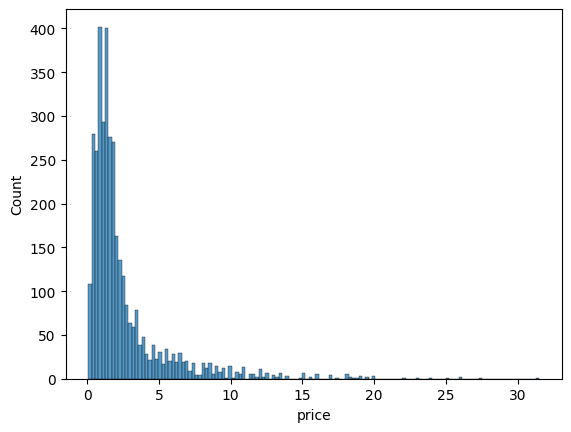

In [108]:
sns.histplot(df['price'])

<Axes: xlabel='price'>

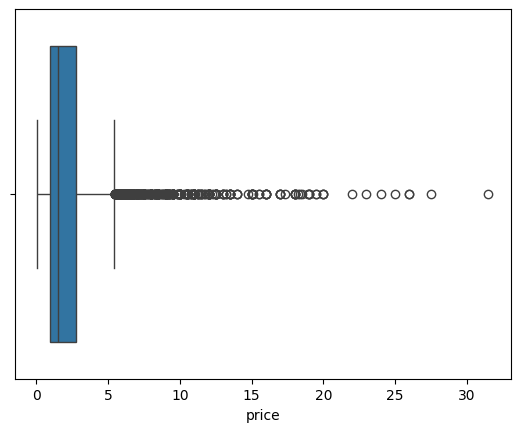

In [109]:
sns.boxplot(x = df['price'])

In [110]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]
outliers.shape[0], outliers['price'].describe()

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [111]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
676,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,1,91
829,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42
3674,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,80
1621,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,156
3524,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
1704,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,140
575,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,2,163
2065,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,1,0,0,0,0,0,63
405,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,171
3340,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,1,0,0,1,0,1,114


There are genuine outliers and error

# price_per_sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

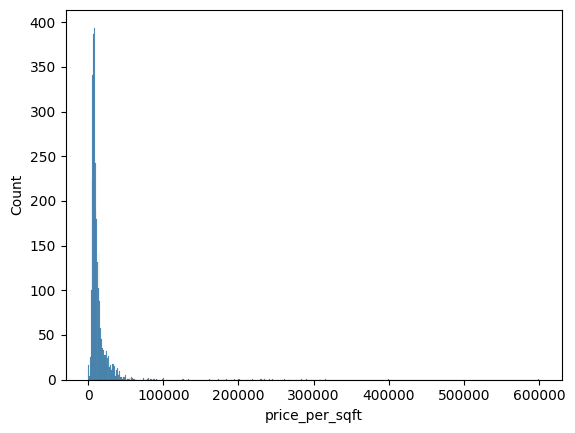

In [112]:
sns.histplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

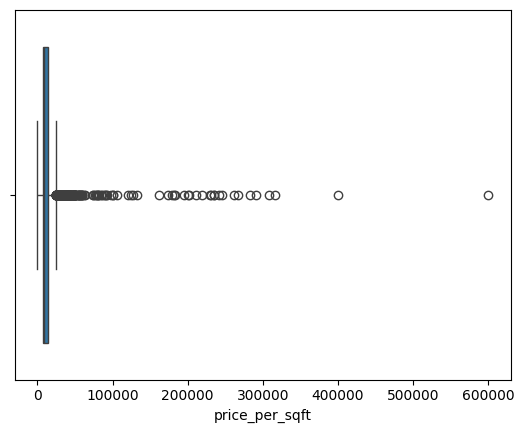

In [113]:
sns.boxplot(x = df['price_per_sqft'])

In [114]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = df[(df['price_per_sqft'] > upper_bound) | (df['price_per_sqft'] < lower_bound)]
outliers.shape[0], outliers['price_per_sqft'].describe()

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [115]:
outliers.sort_values('price_per_sqft',ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
1704,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,140
1125,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,2,123
2447,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,2.0,North-East,Old Property,NaN,NaN,1600.0,0,0,0,0,0,0,0
662,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,5.0,North-West,Relatively New,NaN,60.0,NaN,0,0,0,0,0,0,53
333,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,NaN,West,Moderately Old,NaN,232.0,NaN,1,1,0,1,1,2,49
1968,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,1.0,East,Moderately Old,NaN,240.0,NaN,1,0,0,0,0,0,49
491,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,2.0,North,Relatively New,NaN,300.0,NaN,1,1,0,1,0,0,29
2185,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,2.0,East,Old Property,NaN,402.0,NaN,1,0,0,1,0,2,100
1531,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,5.0,North-West,Relatively New,NaN,145.0,NaN,0,0,0,0,0,1,7
1712,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,3+,4.0,East,Relatively New,NaN,60.0,NaN,0,0,1,0,0,0,79


In [116]:
outliers['area'] = outliers['area'].apply(lambda x: x*9 if x <1000 else x)

/tmp/ipykernel_399990/2278252347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['area'] = outliers['area'].apply(lambda x: x*9 if x <1000 else x)


In [117]:
outliers['price_per_sqft'] = round((outliers['price']*10000000)/(outliers['area']))

/tmp/ipykernel_399990/4002706027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['price_per_sqft'] = round((outliers['price']*10000000)/(outliers['area']))


In [118]:
outliers['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [119]:
df.update(outliers)

/tmp/ipykernel_399990/2142796038.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers)
/tmp/ipykernel_399990/2142796038.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers)
/tmp/ipykernel_399990/2142796038.py:1: FutureWarning: Downcasting behavior in Series a

<Axes: xlabel='price_per_sqft', ylabel='Count'>

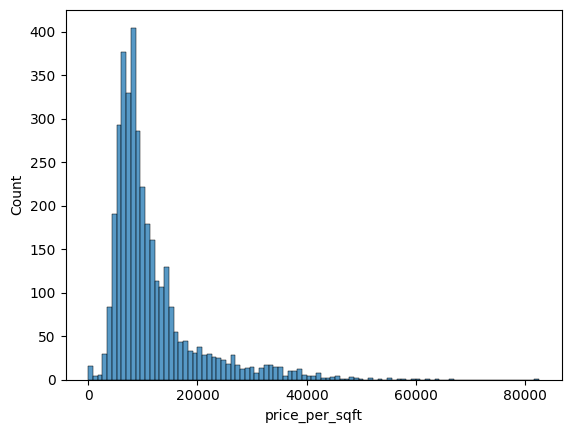

In [120]:
sns.histplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

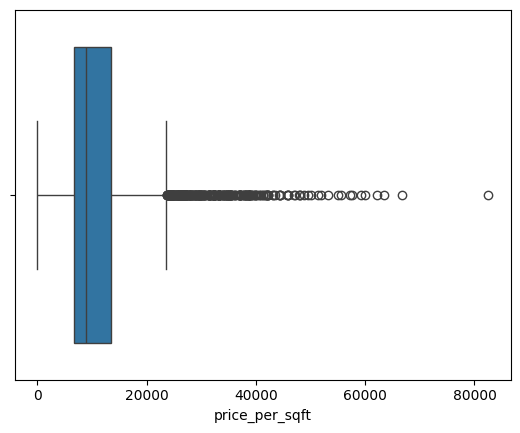

In [121]:
sns.boxplot(x = df['price_per_sqft'])

In [122]:
df[df['price_per_sqft'] > 50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
57,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,1,155
349,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,1000.0,NaN,0,0,0,0,0,0,0
687,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,2,117
940,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,2.0,North,Relatively New,NaN,250.0,200.0,1,1,1,1,0,2,112
1049,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,4.0,East,New Property,NaN,2844.0,NaN,1,1,1,1,0,2,171
1550,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,2,178
1621,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,2,156
1704,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,2,140
2266,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
2948,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0


In [123]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

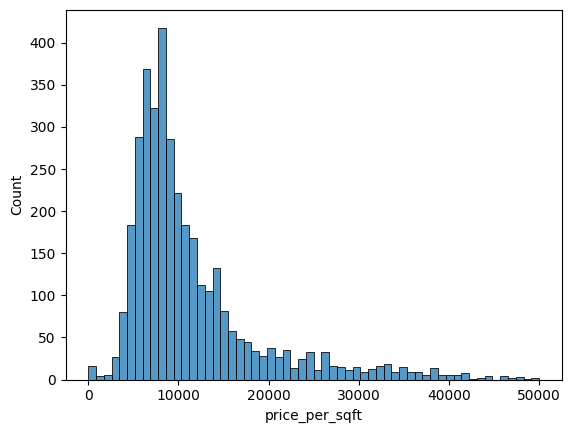

In [124]:
sns.histplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

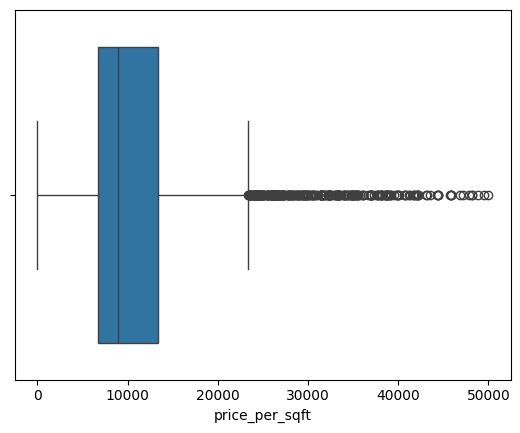

In [125]:
sns.boxplot(x = df['price_per_sqft'])

# Area

/tmp/ipykernel_399990/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

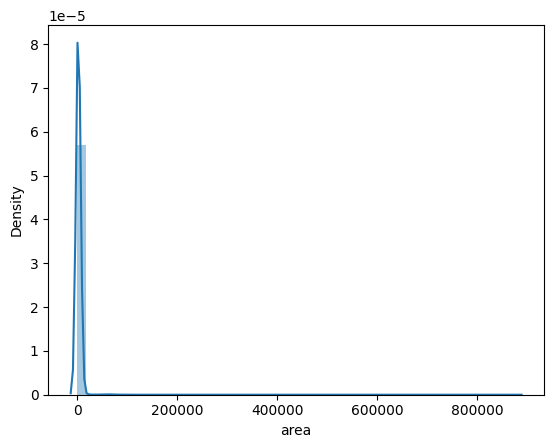

In [126]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

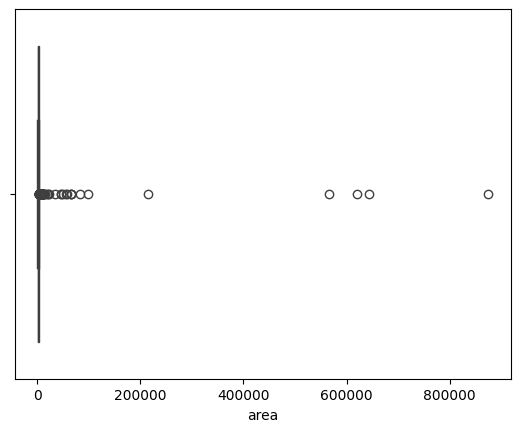

In [127]:
sns.boxplot(x = df['area'])

In [128]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [129]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
1384,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,85
3121,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,0,1,0,0,1,0,65
3377,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,2,0
3382,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
3625,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,1,44


In [130]:
df = df[df['area'] < 100000]
df.describe()

,price,price_per_sqft,area,bedroom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
count,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3623.000000,1875.000000,1659.000000,1863.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,2.491362,11489.825371,2150.001922,3.331411,3.395387,6.833839,1925.237627,1950.789047,1632.301061,0.359418,0.188358,0.090884,0.176002,0.109281,0.616694,78.630972
std,2.867057,7592.010642,3623.832737,1.829673,1.869885,6.027087,764.172177,1442.660446,3389.326376,0.479896,0.391052,0.287484,0.380874,0.312034,0.893829,58.972447
min,0.070000,53.000000,145.000000,1.000000,1.000000,0.000000,89.000000,14.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.950000,6739.500000,1261.250000,2.000000,2.000000,2.000000,1479.500000,1120.000000,845.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
50%,1.510000,8920.000000,1750.000000,3.000000,3.000000,5.000000,1828.000000,1650.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000
75%,2.700000,13389.750000,2343.000000,4.000000,4.000000,10.000000,2215.000000,2400.000000,1787.500000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,120.000000
max,31.500000,50000.000000,98978.000000,21.000000,21.000000,51.000000,10000.000000,13500.000000,64529.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,192.000000


/tmp/ipykernel_399990/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

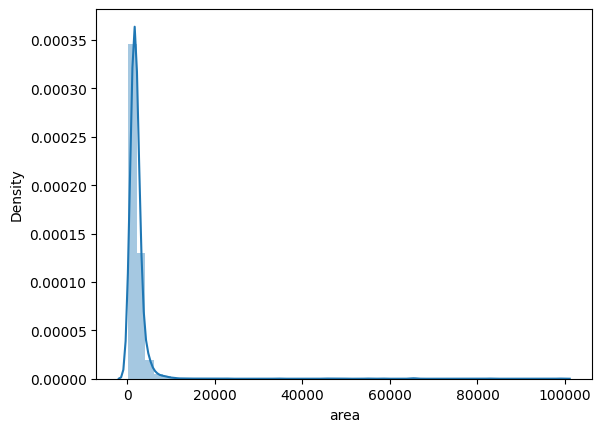

In [131]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

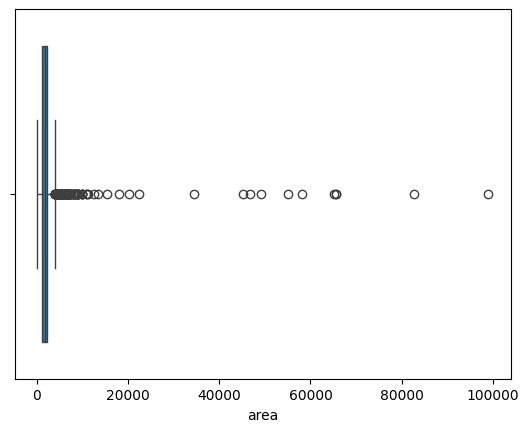

In [132]:
sns.boxplot(x = df['area'])

In [133]:
df[df['area'] > 10000].sort_values('area', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
1844,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,1,0,1,1,0,2,77
2454,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
815,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
2204,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,0,1,0,0,0,0,15
1973,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
1438,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
516,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
2761,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,0,1,0,0,0,0,37
2413,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,1,0,1,0,0,2,118
1403,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [134]:
df.drop(index=[815, 2204, 1438, 516, 2761, 1403, 2743, 2709, 708], inplace=True)

In [135]:
df[df['area'] > 10000].sort_values('area', ascending=True)[['area','super_built_up_area','built_up_area','carpet_area']]

,area,super_built_up_area,built_up_area,carpet_area
1525,10799.0,NaN,3500.0,NaN
97,11000.0,NaN,NaN,11000.00
829,11286.0,NaN,11286.0,NaN
1711,12645.0,NaN,NaN,1175.11
3595,18129.0,NaN,NaN,18122.00
2633,20250.0,NaN,2850.0,2250.00
3198,22498.0,NaN,2660.0,2500.00
2413,46795.0,NaN,5800.0,5200.00
1973,65261.0,NaN,NaN,7250.00
2454,82781.0,NaN,115.0,NaN


In [139]:
df.loc[1525,'area'] = 3500
df.loc[1711,'area'] = 1175
df.loc[3595,'area'] = 1812
df.loc[2633,'area'] = 2850
df.loc[3198,'area'] = 2660
df.loc[2413,'area'] = 5800
df.loc[1973,'area'] = 7250
df.loc[2454,'area'] = 115*9
df.loc[1844,'area'] = 11000

/tmp/ipykernel_399990/91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

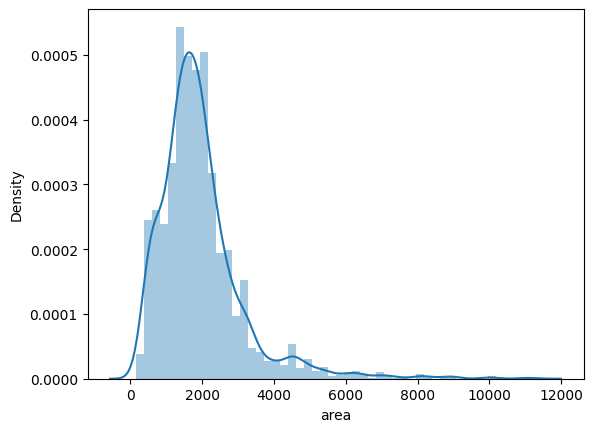

In [140]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

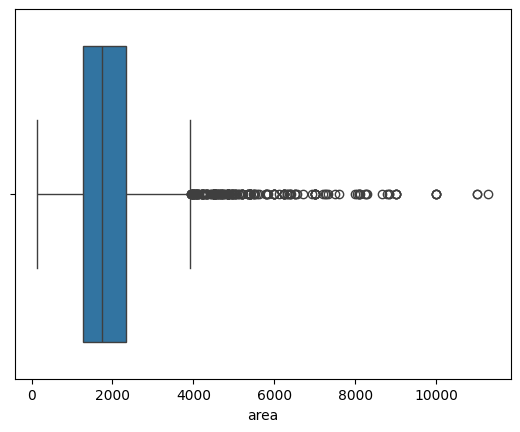

In [141]:
sns.boxplot(x = df['area'])

## Bedroom

/tmp/ipykernel_399990/11865314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedroom'])


<Axes: xlabel='bedroom', ylabel='Density'>

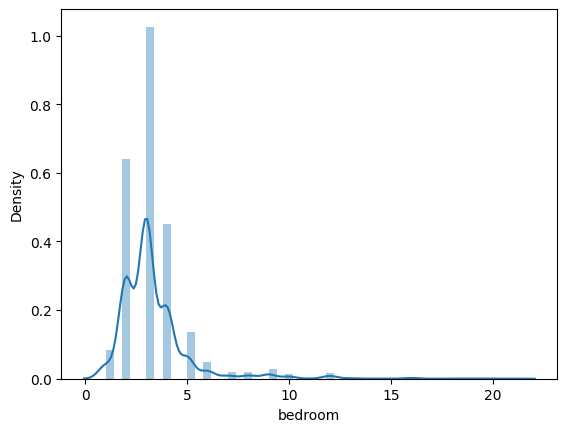

In [142]:
sns.distplot(df['bedroom'])

<Axes: xlabel='bedroom'>

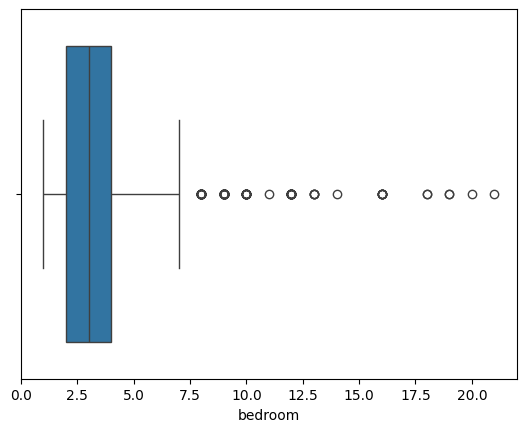

In [144]:
sns.boxplot(x = df['bedroom'])

In [145]:
df['bedroom'].describe()

count    3633.000000
mean        3.334434
std         1.830561
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedroom, dtype: float64

In [146]:
df[df['bedroom'] > 10].sort_values('bedroom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
477,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,1,0,0,0,0,1,49
3618,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,1,0,0,0,0,1,22
2697,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,92
956,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,0,1,1,0,0,0,77
3734,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,1,65
180,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,1,0,0,0,0,1,79
3422,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,2,0
405,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,2,171
2420,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,2,20
2184,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,1,0,0,1,0,2,49


In [147]:
df = df[df['bedroom'] <= 10]

/tmp/ipykernel_399990/11865314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedroom'])


<Axes: xlabel='bedroom', ylabel='Density'>

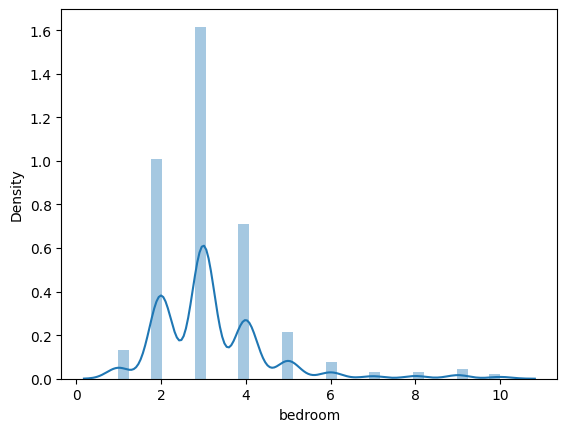

In [148]:
sns.distplot(df['bedroom'])

<Axes: xlabel='bedroom'>

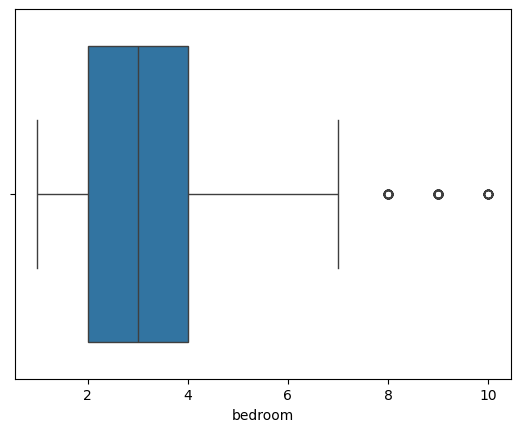

In [149]:
sns.boxplot(x = df['bedroom'])

In [150]:
df['bedroom'].describe()

count    3588.000000
mean        3.204571
std         1.394746
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedroom, dtype: float64

## Bathroom

/tmp/ipykernel_399990/2904465235.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathroom'])


<Axes: xlabel='bathroom', ylabel='Density'>

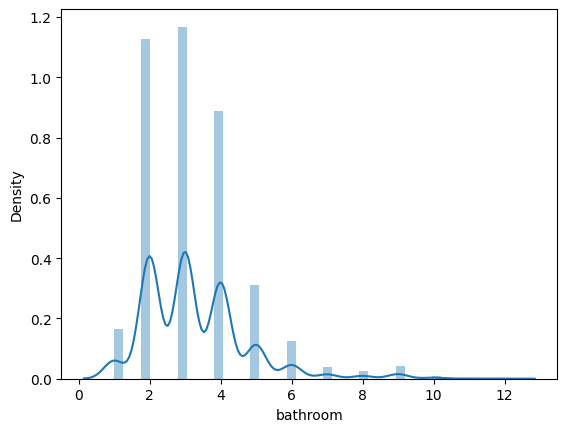

In [151]:
sns.distplot(df['bathroom'])

<Axes: xlabel='bathroom'>

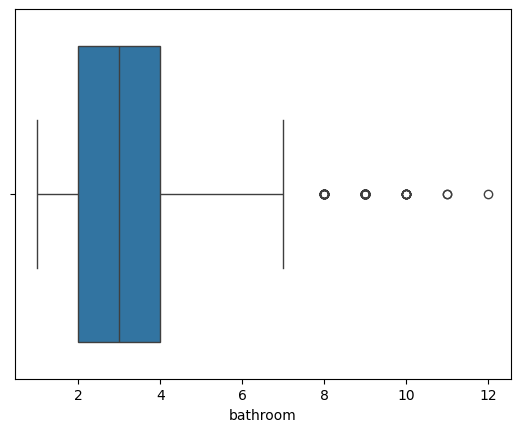

In [153]:
sns.boxplot(x = df['bathroom'])

In [154]:
df[df['bathroom'] > 10].sort_values('bathroom', ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
2762,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,1,0,0,0,0,2,164
198,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,2,39
1842,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [155]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedroom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'study room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

# super_built_up_area

/tmp/ipykernel_399990/4184943455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

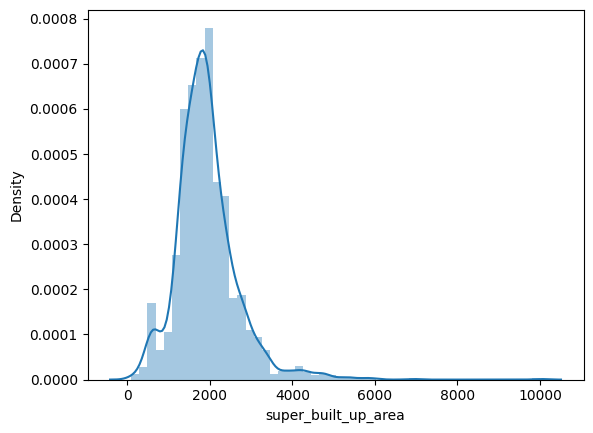

In [156]:
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

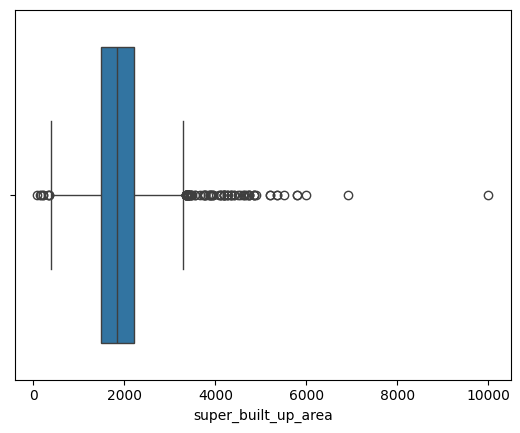

In [157]:
sns.boxplot(x = df['super_built_up_area'])

In [158]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
413,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,1,0,0,1,1,0,49
932,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,1,0,0,0,0,2,158


# built_up_area

/tmp/ipykernel_399990/3494228458.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

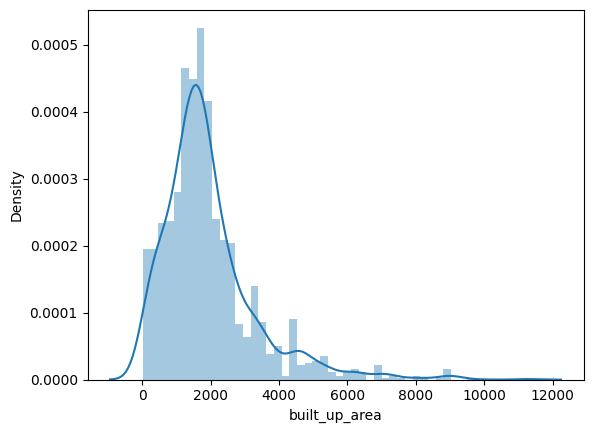

In [159]:
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

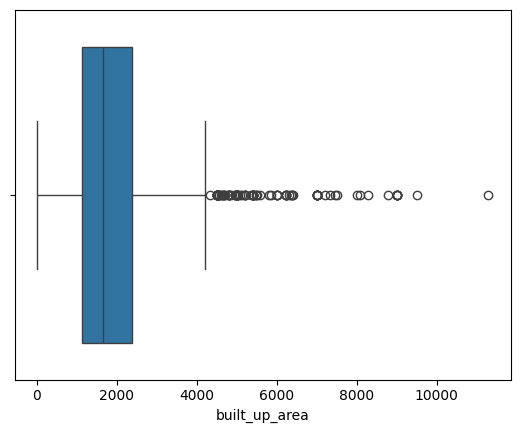

In [160]:
sns.boxplot(x = df['built_up_area'])

In [161]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
829,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,2,42


# carpet_area

/tmp/ipykernel_399990/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

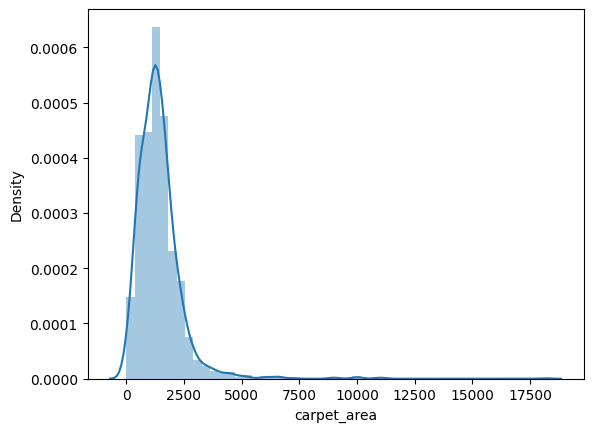

In [162]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

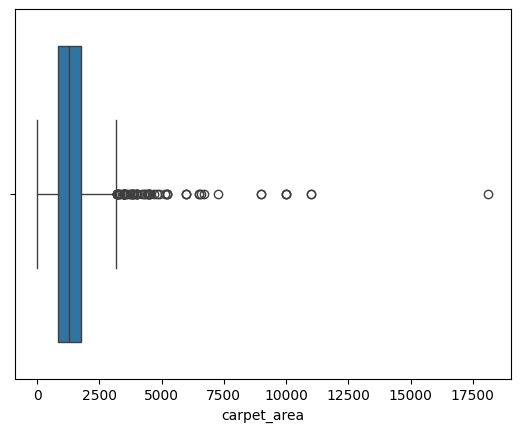

In [163]:
sns.boxplot(x = df['carpet_area'])

In [164]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
97,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,1,0,0,0,0,0,69
1844,house,independent,sector 26,18.4,1859.0,11000.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.0,1,0,1,1,0,2,77
3595,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,Under Construction,NaN,NaN,18122.0,0,1,0,1,1,2,44


In [165]:
df.loc[3595, 'carpet_area'] = 1812

/tmp/ipykernel_399990/3905767603.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

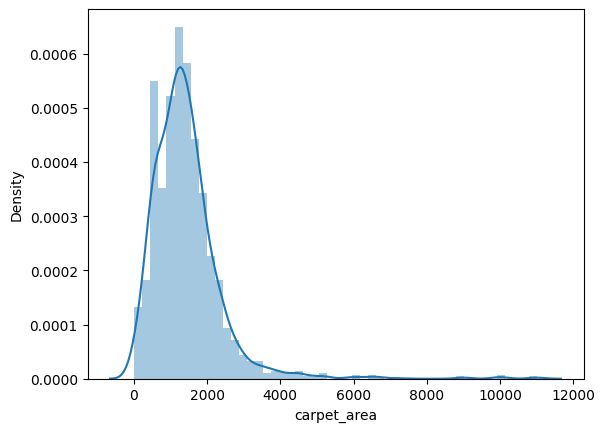

In [166]:
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

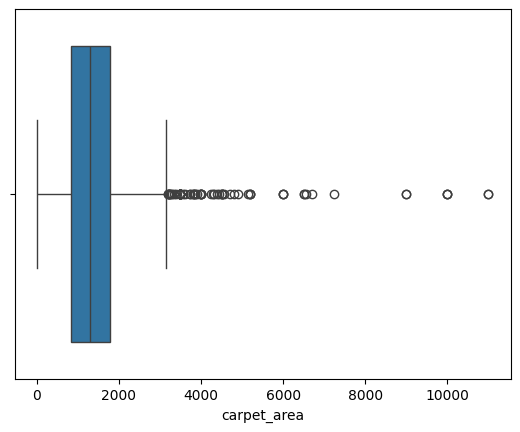

In [168]:
sns.boxplot(x = df['carpet_area'])

# luxury_score

/tmp/ipykernel_399990/3385064764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['luxury_score'])


<Axes: xlabel='luxury_score', ylabel='Density'>

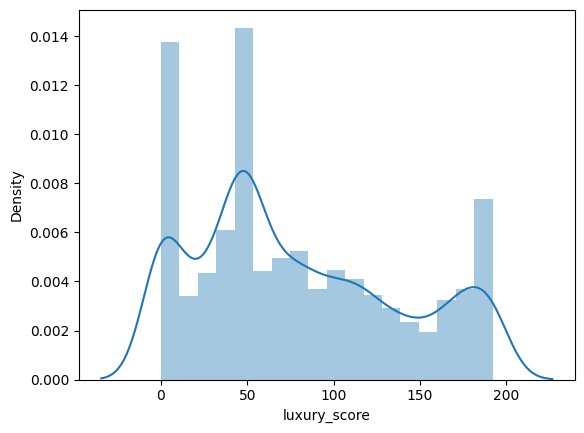

In [169]:
sns.distplot(df['luxury_score'])

<Axes: xlabel='luxury_score'>

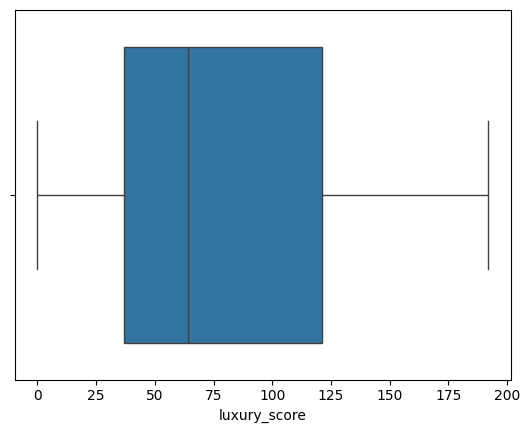

In [170]:
sns.boxplot(x = df['luxury_score'])

In [171]:
df['price_per_sqft'] = round((df['price'] * 10000000)/df['area'])

In [172]:
x = df[df['price_per_sqft'] <= 20000]
(x['area'] / x['bedroom']).quantile(0.05)

250.5

In [176]:
df[(df['area'] / df['bedroom']) < 250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
3510,flat,pivotal devaan,sector 84,0.35,7246.0,483.0,Carpet area: 483 (44.87 sq.m.),2,2,2,4.0,East,Relatively New,NaN,NaN,483.0,0,0,0,0,0,0,37
293,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0
2621,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0
1931,house,my home,sector 110,0.34,12593.0,270.0,Plot area 270(25.08 sq.m.),2,2,2,3.0,West,Moderately Old,NaN,270.0,NaN,0,0,0,0,0,0,22
3136,house,independent,sector 9,0.60,10753.0,558.0,Plot area 62(51.84 sq.m.),3,3,1,2.0,NaN,Relatively New,NaN,558.0,NaN,0,0,0,0,0,0,0


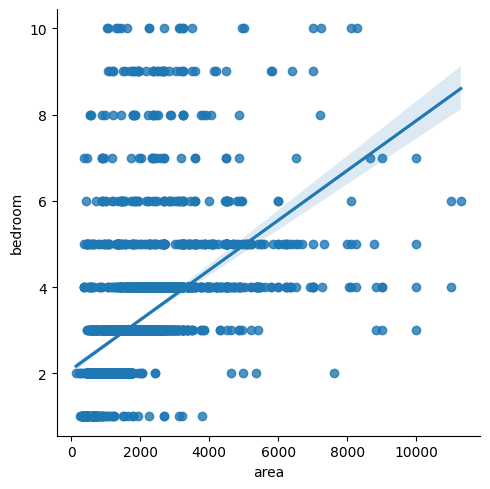

In [174]:
sns.lmplot(data = df, x='area', y = 'bedroom')

In [182]:
df[(df['area'] / df['bedroom']) < 100][df['property_type'] == 'flat'].shape

/tmp/ipykernel_399990/1834374131.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['area'] / df['bedroom']) < 100][df['property_type'] == 'flat'].shape


(0, 23)

In [183]:
df = df[(df['area'] / df['bedroom']) > 100]

In [184]:
outliers = df[(df['area'] / df['bedroom']) < 250][df['bedroom'] > 3]
outliers['bedroom'] = round(outliers['bedroom'] / outliers['floorNum'])

/tmp/ipykernel_399990/3063659076.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[(df['area'] / df['bedroom']) < 250][df['bedroom'] > 3]


In [185]:
df.update(outliers)

/tmp/ipykernel_399990/2142796038.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers)
/tmp/ipykernel_399990/2142796038.py:1: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.update(outliers)
/tmp/ipykernel_399990/2142796038.py:1: FutureWarning: Downcasting behavior in Series a

In [186]:
df[(df['area'] / df['bedroom']) < 250][df['bedroom'] > 4].shape

/tmp/ipykernel_399990/127619734.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['area'] / df['bedroom']) < 250][df['bedroom'] > 4].shape


(13, 23)

In [187]:
df[(df['area'] / df['bedroom']) < 250][df['bedroom'] > 4]

/tmp/ipykernel_399990/2532347942.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['area'] / df['bedroom']) < 250][df['bedroom'] > 4]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedroom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
69,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0
96,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
293,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0
330,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,38
1161,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0
1445,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0
1543,house,independent,sector 3 phase 2,1.10,10000.0,1100.0,Built Up area: 1100 (102.19 sq.m.)Carpet area:...,5,4,2,1.0,East,Undefined,NaN,1100.0,900.0,0,0,0,0,0,0,0
1784,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0
2621,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0
2993,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0


In [188]:
df = df[~(((df['area'] / df['bedroom']) < 250) & (df['bedroom'] > 4))]

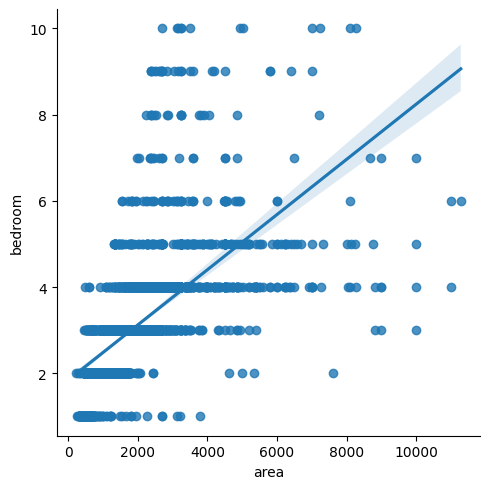

In [189]:
sns.lmplot(data = df, x = 'area', y='bedroom')

In [191]:
file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_outliers_treated.csv')
df.to_csv(file_path, index=False)